In [1]:
from datasets import load_dataset
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
newsqa = load_dataset('newsqa', data_dir = '../data/files')


In [18]:
# get a table of the lengths of 'story_text' in the train and test sets, with unique 'story_id'

lengths_train = pd.DataFrame([{'story_id': x['story_id'], 'length': len(x['story_text'].split())} for x in newsqa['train']])
lengths_test = pd.DataFrame([{'story_id': x['story_id'], 'length': len(x['story_text'].split())} for x in newsqa['test']])

In [19]:
lengths_train

,story_id,length
0,./cnn/stories/42d01e187213e86f5fe617fe32e716ff...,237
1,./cnn/stories/c48228a52f26aca65c31fad273e66164...,446
2,./cnn/stories/c65ed85800e4535f4bbbfa2c34d7d963...,780
3,./cnn/stories/0cf66b646e9b32076513c050edf32a79...,473
4,./cnn/stories/13012604e3203c18df09289dfedd14cd...,396
...,...,...
92544,./cnn/stories/5e7c990b12d43b077d476413a16c05fa...,1903
92545,./cnn/stories/7c06e091d7294c87ba42df50008783d9...,763
92546,./cnn/stories/7b2b414d8cbc968f4df05bcefb2f9f0f...,866
92547,./cnn/stories/4566e90ca5e65f0323c41319030ca434...,389


In [20]:
# verify the story ids are unique
lengths_train['story_id'].nunique() == len(lengths_train)

False

In [21]:
# make them unique in story_id, if lengths are different, keep the lowest one
lengths_train = lengths_train.groupby('story_id').agg('min').reset_index()

In [22]:
lengths_train['story_id'].nunique() == len(lengths_train)

True

In [23]:
lengths_train

,story_id,length
0,./cnn/stories/0005d61497d21ff37a17751829bd7e3b...,1420
1,./cnn/stories/00156d9892fb27f1d2e100cbdd8a3997...,347
2,./cnn/stories/002a083c3893b1fde734280b9eec28d4...,260
3,./cnn/stories/002c962834b7886c600a31a35053543e...,1174
4,./cnn/stories/002cceec34994ff6ff91f6232054e5f7...,1133
...,...,...
11463,./cnn/stories/ffed340ef37e4dbe9f38a85fd6219891...,890
11464,./cnn/stories/fff0486b2ea7e8ba4132c8e8cb87236f...,773
11465,./cnn/stories/fff32094b00f3780cc98fe43bd98aace...,749
11466,./cnn/stories/fffc660ed605dc82ba9f8de5b8e39e44...,949


In [24]:
# count num of repeated story ids
lengths_train['story_id'].value_counts()

story_id
./cnn/stories/0005d61497d21ff37a17751829bd7e3b6e4a7c5c.story    1
./cnn/stories/ab503d942af4e4f3940140304b0b4952a82435d7.story    1
./cnn/stories/aadee19cb8c3afe90bd21ae36fea1b12420b0378.story    1
./cnn/stories/aae1ee90c9619b609ffa9810a25ecf58f79e91c1.story    1
./cnn/stories/aae29a7438a79a3a29ede0365a2f8d289358ccad.story    1
                                                               ..
./cnn/stories/566be049908d10cc04f0284ea1734f8b85b688e1.story    1
./cnn/stories/568239199d0ad8578ff16ee5df0b4ab6f36e395b.story    1
./cnn/stories/5683f5fe9a58bc820c982c148791c58f50157be9.story    1
./cnn/stories/5691704619da40d4207cf10c57fc809cbef52893.story    1
./cnn/stories/fffcaffda91f80b841efaefe04704e0357e4276c.story    1
Name: count, Length: 11468, dtype: int64

In [7]:
lengths_train = [len(x['story_text'].split()) for x in newsqa['train']]
lengths_test = [len(x['story_text'].split()) for x in newsqa['test']]

In [8]:
# create bar plot of lengths

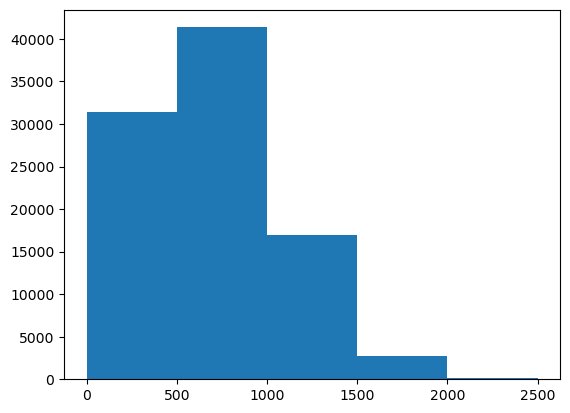

In [9]:

plt.hist(lengths_train, bins = np.arange(0, 2501, 500))
plt.show()

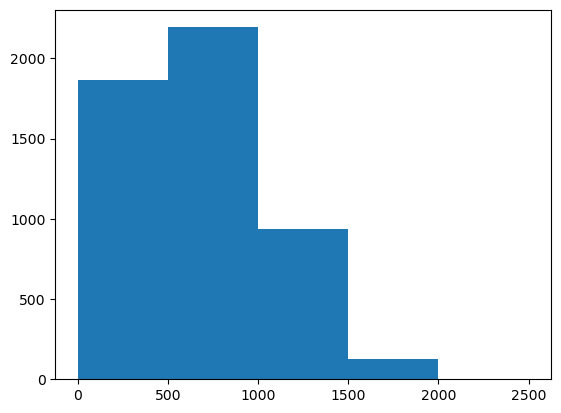

In [10]:
plt.hist(lengths_test, bins = np.arange(0, 2501, 500))
plt.show()